# Loading data

All Samples are here:
all_matched_samples.gct

In [32]:
samples_file = "all_matched_samples.gct"

In [33]:
import pandas as pd
import numpy as np
df = pd.read_table(samples_file, skiprows=2, index_col=0)
Description = df['Description']
df.drop('Description', axis=1, inplace=True)
df.shape

(55490, 224)

# Filtering data

<div class="well well-sm">
Applying a varaiance filter. Filtering out genes with lower standar deviation than 100. Mean std is about 874 for this dataset.

In [34]:
std = df.std(axis=1)
min_std = 100
# mean = df.mean(axis=1)
new_std = std[std > min_std]
print("{} genes were filtered out -- they had a Standard Deviation lower than {} (mean std was ~{})".format(std.count() - new_std.count(), min_std, int(std.mean()) ))
print("New gene lengths is {}".format(new_std.count()))
filtered_df = df.ix[new_std.index]
filtered_df.insert(loc=0,column='Description', value = Description.ix[new_std.index])
filtered_df

39151 genes were filtered out -- they had a Standard Deviation lower than 100 (mean std was ~874)
New gene lengths is 16339


/opt/conda/envs/python3.6/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/opt/conda/envs/python3.6/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,Description,TCGA-A7-A0CE-01,TCGA-A7-A0CE-11,TCGA-A7-A0CH-01,TCGA-A7-A0CH-11,TCGA-A7-A0D9-01,TCGA-A7-A0D9-11,TCGA-A7-A0DB-01,TCGA-A7-A0DB-11,TCGA-A7-A0DC-01,...,TCGA-E9-A1RF-01,TCGA-E9-A1RF-11,TCGA-E9-A1RH-01,TCGA-E9-A1RH-11,TCGA-E9-A1RI-01,TCGA-E9-A1RI-11,TCGA-GI-A2C8-01,TCGA-GI-A2C8-11,TCGA-GI-A2C9-01,TCGA-GI-A2C9-11
Name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,tetraspanin 6,8462.0,5404.0,3036.0,5030.0,2679.0,3616.0,2203.0,2425.0,4094.0,...,676.0,4544.0,327.0,3581.0,1980.0,7639.0,8586.0,422.0,3944.0,4849.0
TNMD,tenomodulin,54.0,320.0,0.0,2116.0,73.0,3616.0,47.0,304.0,14.0,...,41.0,1881.0,0.0,770.0,5.0,3541.0,5.0,16.0,2.0,310.0
DPM1,dolichyl-phosphate mannosyltransferase subunit...,2408.0,2472.0,1497.0,1611.0,4135.0,1254.0,1131.0,1137.0,3050.0,...,3732.0,1565.0,6267.0,1615.0,2885.0,1999.0,2687.0,1675.0,2708.0,2290.0
SCYL3,SCY1 like pseudokinase 3,1518.0,1483.0,3030.0,1154.0,1852.0,820.0,1919.0,687.0,1906.0,...,3155.0,1356.0,775.0,1216.0,2538.0,1287.0,3240.0,751.0,1524.0,1265.0
C1orf112,chromosome 1 open reading frame 112,2056.0,312.0,730.0,252.0,366.0,225.0,725.0,241.0,846.0,...,1010.0,294.0,770.0,236.0,741.0,290.0,617.0,88.0,657.0,343.0
FGR,"FGR proto-oncogene, Src family tyrosine kinase",287.0,869.0,173.0,1536.0,201.0,969.0,846.0,1517.0,102.0,...,910.0,1006.0,338.0,578.0,399.0,377.0,475.0,129.0,422.0,969.0
CFH,complement factor H,1663.0,5760.0,1531.0,4695.0,1672.0,14103.0,2949.0,8647.0,772.0,...,5382.0,24121.0,2915.0,13543.0,4207.0,19118.0,4565.0,3231.0,2747.0,22260.0
FUCA2,"fucosidase, alpha-L- 2, plasma",10475.0,4397.0,1772.0,3930.0,3733.0,3688.0,1737.0,3963.0,2124.0,...,3559.0,3695.0,2814.0,3660.0,2639.0,3746.0,5589.0,726.0,4024.0,3422.0
GCLC,glutamate-cysteine ligase catalytic subunit,2330.0,2775.0,3522.0,3217.0,2527.0,4155.0,2814.0,2833.0,9453.0,...,2968.0,5097.0,4311.0,3845.0,3539.0,7854.0,3397.0,1244.0,2673.0,2536.0


In [36]:
import cuzcatlan as cusca
cusca.df2gct(filtered_df, name='TCGA_BRCA_all_matched_var_filtered.gct')

---

# Looking at the metadata

https://raw.githubusercontent.com/genepattern/download_from_gdc/master/data/metadata.cart.2017-12-21T21_41_22.870798.json

In [61]:
# These are all the patients
patients = list(np.unique([x[:-3] for x in list(filtered_df.drop('Description', axis=1))]))
print(patients)
len(patients)

['TCGA-A7-A0CE', 'TCGA-A7-A0CH', 'TCGA-A7-A0D9', 'TCGA-A7-A0DB', 'TCGA-A7-A0DC', 'TCGA-A7-A13E', 'TCGA-A7-A13F', 'TCGA-A7-A13G', 'TCGA-AC-A23H', 'TCGA-AC-A2FB', 'TCGA-AC-A2FF', 'TCGA-AC-A2FM', 'TCGA-BH-A0AU', 'TCGA-BH-A0AY', 'TCGA-BH-A0AZ', 'TCGA-BH-A0B3', 'TCGA-BH-A0B5', 'TCGA-BH-A0B7', 'TCGA-BH-A0B8', 'TCGA-BH-A0BA', 'TCGA-BH-A0BC', 'TCGA-BH-A0BJ', 'TCGA-BH-A0BM', 'TCGA-BH-A0BQ', 'TCGA-BH-A0BT', 'TCGA-BH-A0BV', 'TCGA-BH-A0BW', 'TCGA-BH-A0BZ', 'TCGA-BH-A0C0', 'TCGA-BH-A0C3', 'TCGA-BH-A0DD', 'TCGA-BH-A0DG', 'TCGA-BH-A0DH', 'TCGA-BH-A0DK', 'TCGA-BH-A0DL', 'TCGA-BH-A0DO', 'TCGA-BH-A0DP', 'TCGA-BH-A0DQ', 'TCGA-BH-A0DT', 'TCGA-BH-A0DV', 'TCGA-BH-A0DZ', 'TCGA-BH-A0E0', 'TCGA-BH-A0E1', 'TCGA-BH-A0H5', 'TCGA-BH-A0H7', 'TCGA-BH-A0H9', 'TCGA-BH-A0HA', 'TCGA-BH-A0HK', 'TCGA-BH-A18J', 'TCGA-BH-A18K', 'TCGA-BH-A18L', 'TCGA-BH-A18M', 'TCGA-BH-A18N', 'TCGA-BH-A18P', 'TCGA-BH-A18Q', 'TCGA-BH-A18R', 'TCGA-BH-A18S', 'TCGA-BH-A18U', 'TCGA-BH-A18V', 'TCGA-BH-A1EN', 'TCGA-BH-A1EO', 'TCGA-BH-A1ET', 'TCGA-B

112

---

##  (abandoned) filtering metadata

In [65]:
# Step through all of the metadata and only save the ones that are associated to the selected patients 

import json
from pprint import pprint
import urllib.request
import validators

link = "https://raw.githubusercontent.com/genepattern/download_from_gdc/master/data/metadata.cart.2017-12-21T21_41_22.870798.json"

if validators.url(link):
    urlfile, __ = urllib.request.urlretrieve(link)
else:
    urlfile = link
temp = open(urlfile)

full_metadata = json.load(temp)
patients_metadata = []

for item in full_metadata:
    if item['cases'][0]['samples'][0]['portions'][0]['analytes'][0]['aliquots'][0]['submitter_id'][:12] in patients:
        patients_metadata.append(item)
len(patients_metadata)

232

In [68]:
file = open('patients_metadata.json','w')
json.dump(patients_metadata, file)

## Loading pre-curated metadata

In [135]:
# Loading metadata from:
# http://gdac.broadinstitute.org/runs/stddata__2016_01_28/data/BRCA/20160128/gdac.broadinstitute.org_BRCA.Clinical_Pick_Tier1.Level_4.2016012800.0.0.tar.gz
# Which is on: http://firebrowse.org/?cohort=BRCA&download_dialog=true

curated_metadata = pd.read_table('BRCA.clin.merged.picked_from_firebrowse.txt', index_col=0)
simplified_t_stage = [i[0:2] for i in curated_metadata.ix['pathology_T_stage']]
curated_metadata.loc['simplified_t_stage'] = simplified_t_stage
curated_metadata

/opt/conda/envs/python3.6/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,tcga-5l-aat0,tcga-5l-aat1,tcga-a1-a0sp,tcga-a2-a04v,tcga-a2-a04y,tcga-a2-a0cq,tcga-a2-a1g4,tcga-a2-a25a,tcga-a7-a0cd,tcga-a7-a13g,...,tcga-s3-aa11,tcga-s3-aa14,tcga-s3-aa15,tcga-ul-aaz6,tcga-uu-a93s,tcga-v7-a7hq,tcga-wt-ab44,tcga-xx-a899,tcga-xx-a89a,tcga-z7-a8r6
Hybridization REF,,,,,,,,,,,,,,,,,,,,,
Composite Element REF,value,value,value,value,value,value,value,value,value,value,...,value,value,value,value,value,value,value,value,value,value
years_to_birth,42,63,40,39,53,62,71,44,66,79,...,67,47,51,73,63,75,NaN,46,68,46
vital_status,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
days_to_death,NaN,NaN,NaN,1920,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,116,NaN,NaN,NaN,NaN,NaN
days_to_last_followup,1477,1471,584,NaN,1099,2695,595,3276,1165,718,...,421,529,525,518,NaN,2033,883,467,488,3256
tumor_tissue_site,breast,breast,breast,breast,breast,breast,breast,breast,breast,breast,...,breast,breast,breast,breast,breast,breast,breast,breast,breast,breast
pathologic_stage,stage iia,stage iv,stage iia,stage iia,stage iib,stage ia,stage iiia,stage iia,stage i,stage iia,...,stage iia,stage i,stage iib,stage iia,stage iv,stage iiia,stage ia,stage iiia,stage iib,stage i
pathology_T_stage,t2,t2,t2,t2,t2,t1,t3,t2,t1,t2,...,t2,t1,t2,t2,t4d,t1c,t1c,t1c,t3,t1c
pathology_N_stage,n0,n0,n0 (i-),n0 (i-),n1mi,n0 (i-),n1a,n0 (i-),n0,n0,...,n0,n0 (i+),n1a,n0,n3b,n2a,n0 (i-),n2a,n0,n0


In [80]:
patients[0].lower() in list(curated_metadata)

True

In [87]:
list(curated_metadata)

['tcga-5l-aat0',
 'tcga-5l-aat1',
 'tcga-a1-a0sp',
 'tcga-a2-a04v',
 'tcga-a2-a04y',
 'tcga-a2-a0cq',
 'tcga-a2-a1g4',
 'tcga-a2-a25a',
 'tcga-a7-a0cd',
 'tcga-a7-a13g',
 'tcga-a7-a26e',
 'tcga-a7-a26f',
 'tcga-a7-a26h',
 'tcga-a7-a26i',
 'tcga-a7-a2kd',
 'tcga-a7-a3j1',
 'tcga-a7-a426',
 'tcga-a7-a5zx',
 'tcga-a8-a06t',
 'tcga-a8-a06u',
 'tcga-a8-a07e',
 'tcga-a8-a084',
 'tcga-a8-a08f',
 'tcga-a8-a08s',
 'tcga-a8-a091',
 'tcga-a8-a093',
 'tcga-a8-a09c',
 'tcga-a8-a09e',
 'tcga-a8-a09i',
 'tcga-a8-a09k',
 'tcga-ac-a3w5',
 'tcga-ac-a3w6',
 'tcga-ac-a5ei',
 'tcga-ac-a5xs',
 'tcga-ac-a62x',
 'tcga-ao-a0ji',
 'tcga-ao-a1kt',
 'tcga-aq-a0y5',
 'tcga-aq-a54n',
 'tcga-aq-a54o',
 'tcga-aq-a7u7',
 'tcga-ar-a1am',
 'tcga-ar-a1ar',
 'tcga-ar-a2ll',
 'tcga-ar-a2lr',
 'tcga-ar-a5qm',
 'tcga-b6-a0i8',
 'tcga-bh-a0b6',
 'tcga-bh-a0do',
 'tcga-bh-a0ea',
 'tcga-bh-a18h',
 'tcga-bh-a1f5',
 'tcga-bh-a8fy',
 'tcga-c8-a1hl',
 'tcga-d8-a146',
 'tcga-e2-a158',
 'tcga-e2-a15o',
 'tcga-e2-a1bc',
 'tcga-e2-a1l8

count     1097
unique       5
top         t2
freq       635
Name: simplified_t_stage, dtype: object

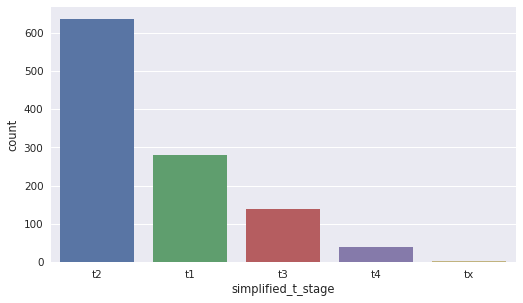

In [137]:
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4.5), dpi=75)
sns.set(style="darkgrid")
sns.countplot(x =curated_metadata.ix['simplified_t_stage'])
curated_metadata.ix['simplified_t_stage'].describe()

count     1002
unique       2
top        yes
freq       556
Name: radiation_therapy, dtype: object

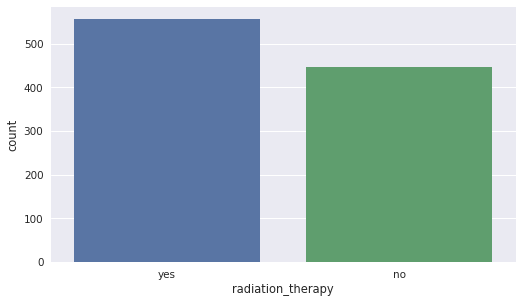

In [138]:
plt.figure(figsize=(8,4.5), dpi=75)
sns.countplot(x =curated_metadata.ix['radiation_therapy'])
curated_metadata.ix['radiation_therapy'].describe()

# doing stuff

In [1]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.GPAuthWidget(genepattern.register_session("https://gp-beta-ami.genepattern.org/gp", "", ""))

GPAuthWidget()

In [2]:
renamefile_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00338')
renamefile_job_spec = renamefile_task.make_job_spec()
renamefile_job_spec.set_parameter("input.file", "https://datasets.genepattern.org/data/TCGA_BRCA_temp/TCGA_BRCA_all_matched_samples.gct")
renamefile_job_spec.set_parameter("output.filename", "BRCA.gct")
renamefile_job_spec.set_parameter("screen.filename", "no")
renamefile_job_spec.set_parameter("force.copy", "no")
genepattern.GPTaskWidget(renamefile_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00338')

In [3]:
job20823 = gp.GPJob(genepattern.get_session(0), 20823)
genepattern.GPJobWidget(job20823)

GPJobWidget(job_number=20823)

In [4]:
hierarchicalclustering_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00009')
hierarchicalclustering_job_spec = hierarchicalclustering_task.make_job_spec()
genepattern.GPTaskWidget(hierarchicalclustering_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00009')

# Below is older work.

## Preprocess Dataset 

In [5]:
preprocessdataset_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00020')
preprocessdataset_job_spec = preprocessdataset_task.make_job_spec()
preprocessdataset_job_spec.set_parameter("input.filename", "https://gp-beta-ami.genepattern.org/gp/jobResults/18035/BRCA.gct")
preprocessdataset_job_spec.set_parameter("threshold.and.filter", "1")
preprocessdataset_job_spec.set_parameter("floor", "20")
preprocessdataset_job_spec.set_parameter("ceiling", "2000000")
preprocessdataset_job_spec.set_parameter("min.fold.change", "3")
preprocessdataset_job_spec.set_parameter("min.delta", "100")
preprocessdataset_job_spec.set_parameter("num.outliers.to.exclude", "0")
preprocessdataset_job_spec.set_parameter("row.normalization", "0")
preprocessdataset_job_spec.set_parameter("row.sampling.rate", "1")
preprocessdataset_job_spec.set_parameter("threshold.for.removing.rows", "")
preprocessdataset_job_spec.set_parameter("number.of.columns.above.threshold", "")
preprocessdataset_job_spec.set_parameter("log2.transform", "0")
preprocessdataset_job_spec.set_parameter("output.file.format", "3")
preprocessdataset_job_spec.set_parameter("output.file", "<input.filename_basename>.preprocessed")
genepattern.GPTaskWidget(preprocessdataset_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00020')

In [6]:
job18036 = gp.GPJob(genepattern.get_session(0), 18036)
genepattern.GPJobWidget(job18036)

GPJobWidget(job_number=18036)

In [7]:
hierarchicalclustering_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00009')
hierarchicalclustering_job_spec = hierarchicalclustering_task.make_job_spec()
hierarchicalclustering_job_spec.set_parameter("input.filename", "https://datasets.genepattern.org/data/TCGA_BRCA_temp/TCGA_BRCA_all_matched_samples.gct")
hierarchicalclustering_job_spec.set_parameter("column.distance.measure", "2")
hierarchicalclustering_job_spec.set_parameter("output_distance_matrix", "False")
hierarchicalclustering_job_spec.set_parameter("row.distance.measure", "0")
hierarchicalclustering_job_spec.set_parameter("clustering.method", "a")
hierarchicalclustering_job_spec.set_parameter("output.base.name", "<input.filename_basename>")
hierarchicalclustering_job_spec.set_parameter("row.centering", "Mean")
hierarchicalclustering_job_spec.set_parameter("row.normalize", "False")
hierarchicalclustering_job_spec.set_parameter("col.centering", "Mean")
hierarchicalclustering_job_spec.set_parameter("col.normalize", "False")
genepattern.GPTaskWidget(hierarchicalclustering_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00009')

In [8]:
job18044 = gp.GPJob(genepattern.get_session(0), 18044)
genepattern.GPJobWidget(job18044)

GPJobWidget(job_number=18044)

In [9]:
hierarchicalclusteringviewer_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00031')
hierarchicalclusteringviewer_job_spec = hierarchicalclusteringviewer_task.make_job_spec()
hierarchicalclusteringviewer_job_spec.set_parameter("cdt.file", "https://gp-beta-ami.genepattern.org/gp/jobResults/18044/TCGA_BRCA_all_matched_samples.cdt")
hierarchicalclusteringviewer_job_spec.set_parameter("gtr.file", "")
hierarchicalclusteringviewer_job_spec.set_parameter("atr.file", "https://gp-beta-ami.genepattern.org/gp/jobResults/18044/TCGA_BRCA_all_matched_samples.atr")
genepattern.GPTaskWidget(hierarchicalclusteringviewer_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00031')

In [10]:
job18348 = gp.GPJob(genepattern.get_session(0), 18348)
genepattern.GPJobWidget(job18348)

GPJobWidget(job_number=18348)

In [11]:
hierarchicalclustering_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00009')
hierarchicalclustering_job_spec = hierarchicalclustering_task.make_job_spec()
hierarchicalclustering_job_spec.set_parameter("input.filename", "https://gp-beta-ami.genepattern.org/gp/jobResults/18036/BRCA.preprocessed.gct")
hierarchicalclustering_job_spec.set_parameter("column.distance.measure", "2")
hierarchicalclustering_job_spec.set_parameter("output_distance_matrix", "False")
hierarchicalclustering_job_spec.set_parameter("row.distance.measure", "0")
hierarchicalclustering_job_spec.set_parameter("clustering.method", "a")
hierarchicalclustering_job_spec.set_parameter("output.base.name", "<input.filename_basename>")
hierarchicalclustering_job_spec.set_parameter("row.centering", "Mean")
hierarchicalclustering_job_spec.set_parameter("row.normalize", "True")
hierarchicalclustering_job_spec.set_parameter("col.centering", "Mean")
hierarchicalclustering_job_spec.set_parameter("col.normalize", "True")
genepattern.GPTaskWidget(hierarchicalclustering_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00009')

In [12]:
job18043 = gp.GPJob(genepattern.get_session(0), 18043)
genepattern.GPJobWidget(job18043)

GPJobWidget(job_number=18043)

In [13]:
hierarchicalclusteringviewer_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00031')
hierarchicalclusteringviewer_job_spec = hierarchicalclusteringviewer_task.make_job_spec()
hierarchicalclusteringviewer_job_spec.set_parameter("cdt.file", "https://gp-beta-ami.genepattern.org/gp/jobResults/18043/BRCA.preprocessed.cdt")
hierarchicalclusteringviewer_job_spec.set_parameter("gtr.file", "")
hierarchicalclusteringviewer_job_spec.set_parameter("atr.file", "https://gp-beta-ami.genepattern.org/gp/jobResults/18043/BRCA.preprocessed.atr")
genepattern.GPTaskWidget(hierarchicalclusteringviewer_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00031')

In [14]:
job18046 = gp.GPJob(genepattern.get_session(0), 18046)
genepattern.GPJobWidget(job18046)

GPJobWidget(job_number=18046)

In [19]:
import genepattern
# import cuzcatlan as cusca
# import pandas as pd    
from cuzcatlan import hc_samples

genepattern.GPUIBuilder(hc_samples, name="Hierarchical Clustering of Samples (Columns).", 
                        description="This function performs hierarchical clustering to group samples (columns) with similar phenotypes..",
                        parameters={
                                "distance_metric":{
                                                      "default": "pearson",
                                                      "choices":{'Information Coefficient':"information_coefficient",
                                                                 'City Block (Manhattan or L1-norm)':'manhattan',
                                                                 'Euclidean (L2-norm)':"euclidean",
                                                                 'Pearson Correlation':"pearson",
                                                                 'Uncentered Pearson Correlation':'uncentered_pearson',
                                                                 'Uncentered Pearson Correlation, absolute value':'absolute_uncentered_pearson',
                                                                 'Spearman Correlation':'spearman',
                                                                 "Kendall's Tau": 'kendall',
                                                                 'Cosine distance':'cosine',
                                                                }
                                                     },
                            "input_gene_expression":{
                                "type": "file",
                                "kinds":["gct"]}
                        })

GPUIBuilder(description='This function performs hierarchical clustering to group samples (columns) with similar phenotypes..', function_import='hc_samples', name='Hierarchical Clustering of Samples (Columns).', params=[{'name': 'input_gene_expression', 'label': 'input_gene_expression', 'optional': False, 'default': '', 'description': 'gene expression data filename (.gct file) where rows are genes and columns are samples', 'hide': False, 'type': 'file', 'kinds': ['gct'], 'choices': []}, {'name': 'clustering_type', 'label': 'clustering_type', 'optional': False, 'default': '', 'description': 'single or consensus -- Only single is suported at the moment', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'distance_metric', 'label': 'distance_metric', 'optional': False, 'default': 'pearson', 'description': 'the function to be used when comparing the distance/similarity of the columns in the input_gene_expression dataset', 'hide': False, 'type': 'text', 'kinds': None, 'choices': {'Information Coefficient': 'information_coefficient', 'City Block (Manhattan or L1-norm)': 'manhattan', 'Euclidean (L2-norm)': 'euclidean', 'Pearson Correlation': 'pearson', 'Uncentered Pearson Correlation': 'uncentered_pearson', 'Uncentered Pearson Correlation, absolute value': 'absolute_uncentered_pearson', 'Spearman Correlation': 'spearman', "Kendall's Tau": 'kendall', 'Cosine distance': 'cosine'}}, {'name': 'file_basename', 'label': 'file_basename', 'optional': True, 'default': 'HC_out', 'description': 'the name to use when naming output files', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'clusters_to_highlight', 'label': 'clusters_to_highlight', 'optional': True, 'default': 'None', 'description': 'how many clusters to highlight in the dendrogram', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}])

In [25]:
hc_samples(input_gene_expression="https://datasets.genepattern.org/data/TCGA_BRCA_temp/TCGA_BRCA_all_matched.filtered.gct", clustering_type="Single", distance_metric="pearson", file_basename="HC_out_2", clusters_to_highlight=6)

Currenty clustering_type is being ignored, only 'single' is supported.
Now we will start performing hierarchical clustering, this may take a little while.


KeyboardInterrupt: 

In [15]:
nmfconsensus_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00057')
nmfconsensus_job_spec = nmfconsensus_task.make_job_spec()
nmfconsensus_job_spec.set_parameter("dataset.filename", "https://gp-beta-ami.genepattern.org/gp/jobResults/18035/BRCA.gct")
nmfconsensus_job_spec.set_parameter("k.initial", "2")
nmfconsensus_job_spec.set_parameter("k.final", "6")
nmfconsensus_job_spec.set_parameter("num.clusterings", "20")
nmfconsensus_job_spec.set_parameter("max.num.iterations", "2000")
nmfconsensus_job_spec.set_parameter("error.function", "divergence")
nmfconsensus_job_spec.set_parameter("random.seed", "123456789")
nmfconsensus_job_spec.set_parameter("output.file.prefix", "<dataset.filename_basename>")
nmfconsensus_job_spec.set_parameter("stop.convergence", "40")
nmfconsensus_job_spec.set_parameter("stop.frequency", "10")
genepattern.GPTaskWidget(nmfconsensus_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00057')

In [16]:
job18037 = gp.GPJob(genepattern.get_session(0), 18037)
genepattern.GPJobWidget(job18037)

GPJobWidget(job_number=18037)

In [17]:
nmfconsensus_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00057')
nmfconsensus_job_spec = nmfconsensus_task.make_job_spec()
nmfconsensus_job_spec.set_parameter("dataset.filename", "https://gp-beta-ami.genepattern.org/gp/jobResults/18036/BRCA.preprocessed.gct")
nmfconsensus_job_spec.set_parameter("k.initial", "2")
nmfconsensus_job_spec.set_parameter("k.final", "6")
nmfconsensus_job_spec.set_parameter("num.clusterings", "20")
nmfconsensus_job_spec.set_parameter("max.num.iterations", "2000")
nmfconsensus_job_spec.set_parameter("error.function", "divergence")
nmfconsensus_job_spec.set_parameter("random.seed", "123456789")
nmfconsensus_job_spec.set_parameter("output.file.prefix", "<dataset.filename_basename>")
nmfconsensus_job_spec.set_parameter("stop.convergence", "40")
nmfconsensus_job_spec.set_parameter("stop.frequency", "10")
genepattern.GPTaskWidget(nmfconsensus_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00057')

In [18]:
job18041 = gp.GPJob(genepattern.get_session(0), 18041)
genepattern.GPJobWidget(job18041)

GPJobWidget(job_number=18041)